In [1]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

In [2]:
data = np.loadtxt("data.txt")

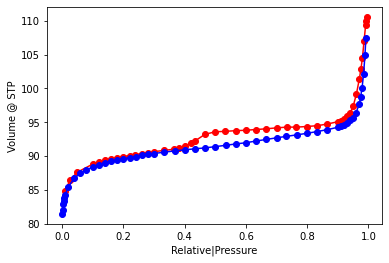

In [3]:
p,a=np.split(data,2,axis=1)
plt.ylabel('Volume @ STP')
plt.xlabel('Relative|Pressure')
a_max = np.argmax(a)
plt.plot(p[a_max:], a[a_max:], marker='o', c='r')
plt.plot(p[:a_max], a[:a_max], marker='o', c='b')
plt.show()

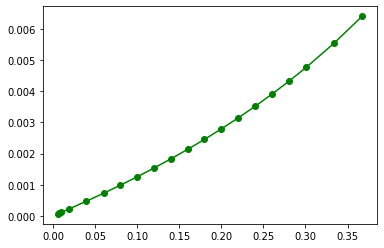

In [4]:
new_y = p/(a*(1-p))
N = 23
plt.plot(p[3:N], new_y[3:N], marker='o', c='g')
plt.show()

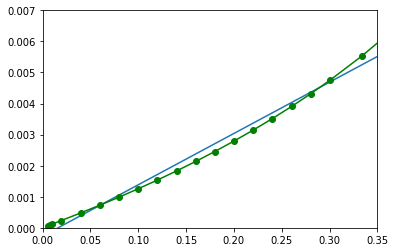

Line 0.016523847708894396*x + -0.0002677745429754911
R value 0.9855202400210799


In [5]:
def lin_reg(N0, N):
    model = LinearRegression()
    model.fit(p[N0:N], new_y[N0:N])
    r = model.score(p[N0:N], new_y[N0:N])
    k = model.coef_[0][0]
    b = model.intercept_[0]
    return k, b, r
k, b, r = lin_reg(3, N)
plt.xlim(0, 0.35)
plt.ylim(0, 0.007)
plt.plot([0, 1], [b, k + b], marker = 'o')
plt.plot(p[3:N], new_y[3:N], marker='o', c='g')
plt.show()
print(f"Line {k}*x + {b}")
print(f"R value {r}")

In [6]:
def calc_consts(k, b):
    c = k/b + 1
    am = 1 / (b*c) /22.4*10**-3
    Na =  6.022140 * (10**23)
    wm = 16.2 * (10**-20)
    As = Na * am * wm
    return am, c, As
am, c, As = calc_consts(k, b)
print(f"A = {As}")
print(f"Am = {am}\nC = {c}")

A = 267.91818873591035
Am = 0.0027462263910359086
C = -60.708060539596524


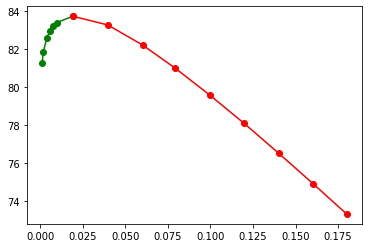

P/P0 max = [0.0192936]


In [7]:
P0 = 1
Rokkel_y = a * P0 * (1 - p)
Rokkel_y_max = np.argmax(Rokkel_y[:int(len(Rokkel_y)/2)])
plt.plot(p[:Rokkel_y_max+1], Rokkel_y[:Rokkel_y_max+1], marker='o', c='g')
plt.plot(p[Rokkel_y_max:15], Rokkel_y[Rokkel_y_max:15], marker='o', c='r')
plt.show()
print(f"P/P0 max = {p[Rokkel_y_max]}")

In [2]:
plt.xlim(0, p[Rokkel_y_max])
plt.ylim(0, new_y[Rokkel_y_max])
for i, p_min in enumerate(p[:Rokkel_y_max-1]):
    k, b, r = lin_reg(i, Rokkel_y_max)
    am, c, As = calc_consts(k, b)
    plt.plot([0, 1], [b, k + b], marker = 'o')
    print(f"№{i+1}) с = {c}")
    print(f"Line {k}*x + {b}\n")
    print(f"{As}")

plt.plot(p[:Rokkel_y_max], new_y[:Rokkel_y_max], marker='o', c='g')
plt.show()

NameError: name 'plt' is not defined

a_micro = 3731.127217112385 (моль/g)
S = 21.692467190487513 (м^2/g)


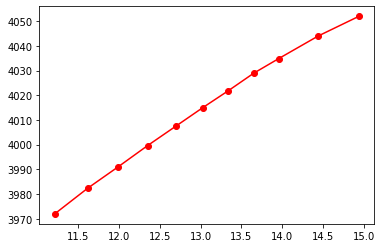

In [9]:
a0 = 27.1667
a1 = 23.4490
a2 = 16.7500
a3 = 6.5135
a4 = 0.9971
a5 = 0
b = np.log(p)
compare_y = a0 + a1*b + a2*(b**2) + a3*(b**3) + a4*(b**4) + a5*(b**5)
am = (a/22.4)*10**3 # sorb in mole/g
model = LinearRegression()
model.fit(compare_y[12:23], am[12:23])
r = model.score(compare_y[12:23], am[12:23])
k = model.coef_[0][0]
b = model.intercept_[0]

print(f"a_micro = {b} (моль/g)")
print(f"S = {k} (м^2/g)")

plt.plot(compare_y[12:23], am[12:23], marker='o', c='r')
plt.show()

In [10]:
dens_N = 0.808 # g(adsorb)/cm^3
mol_mass_N2 = 28 # g(adsorb)/mole
V = b * mol_mass_N2 * 10 **-6 / dens_N # cm^3/g(adsorb)
print(V)

0.12929648772171629



0.3801936904960178
0.14885875715071917 cm^3
5.353042784901742 кДж
2.7647826842974994 нм


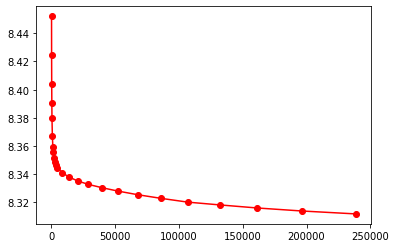

In [30]:
N = 25
M = 50
print()
am = a/22.4*10**3 # sorb in mole/g
a_ln = np.log(am)
BETA = 0.33
T = 77 # K
R = 8.31446 # Дж/(моль∙К)
A_sqr = (-R*T*np.log(p))**2
model = LinearRegression()
model.fit(A_sqr[N:M], a_ln[N:M])
r = model.score(A_sqr[N:M], a_ln[N:M])
print(r)
k = model.coef_[0][0]
b = model.intercept_[0]

b = np.exp(b)

dens_N = 0.808 # g(adsorb)/cm^3
mol_mass_N2 = 28 # g(adsorb)/mole
V = b * mol_mass_N2 * 10 **-6 / dens_N # cm^3/g(adsorb)
E0 = np.sqrt(1/((BETA**2)*(-k))) / 10**3 # кДж
R = 14.8/E0 # нм
print(V, "cm^3")
print(E0, "кДж")
print(R, "нм")
plt.plot(A_sqr[N:M], a_ln[N:M], marker='o', c='r')
